<h1> Thresholding </h1>

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [15]:
def show_img(img):
    fig = plt.figure(figsize = (15,15))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

In [8]:
# 0 flag reads the image in grayscale
img = cv.imread('DATA/crossword.jpg', 0)

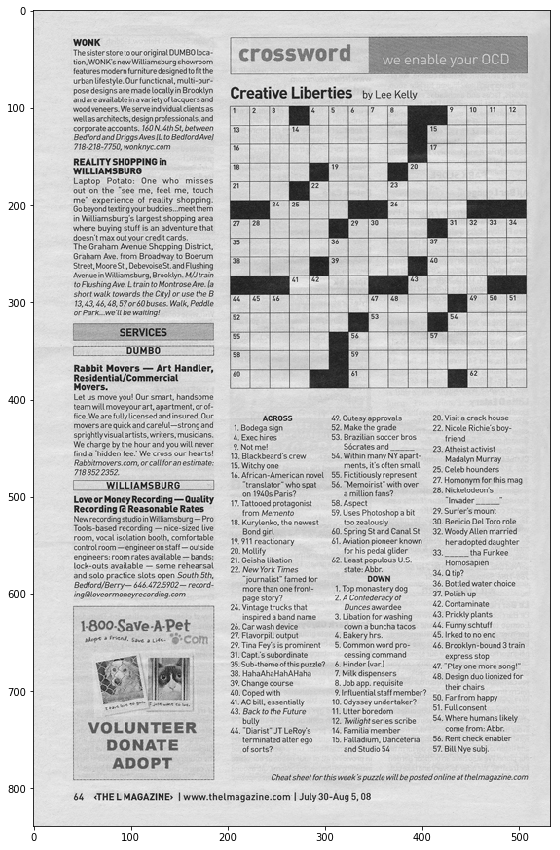

In [48]:
show_img(img)

<h3> Reducing the image to have either pure black or pure white is called thresholding </h3>
which means that image will contain either 0 or 255 (basically) <br>
but there are variations as we'll see

In [23]:
level, th_pic = cv.threshold(img, 160, 255, cv.THRESH_BINARY)

In [13]:
level

127.0

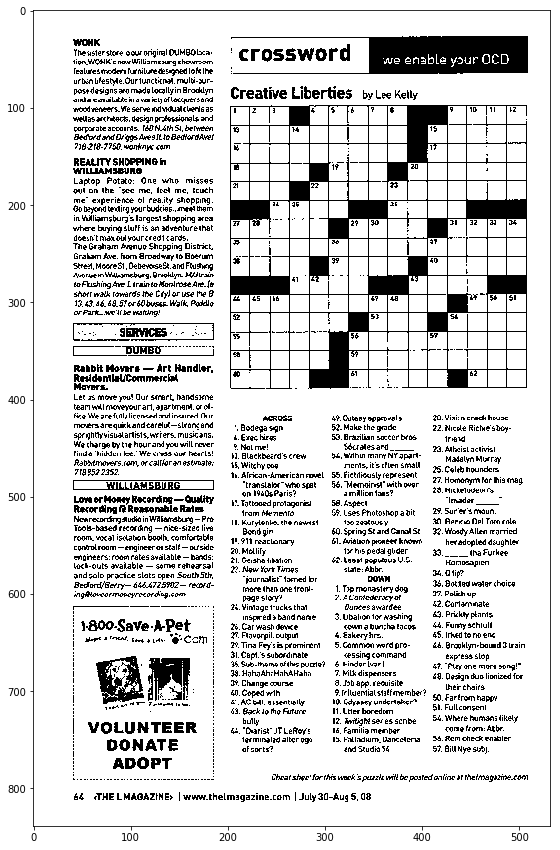

In [24]:
show_img(th_pic)

In [33]:
level, th_pic = cv.threshold(img, 170, 255, cv.THRESH_BINARY_INV)

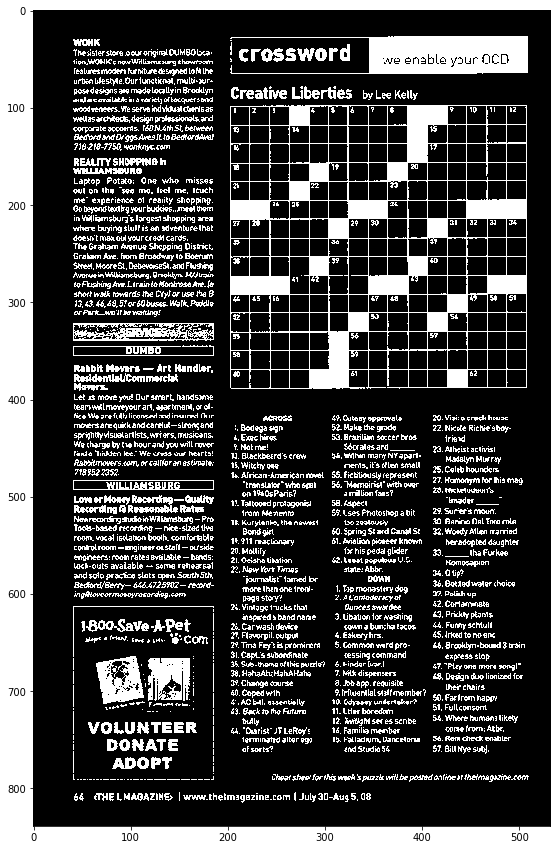

In [34]:
show_img(th_pic)

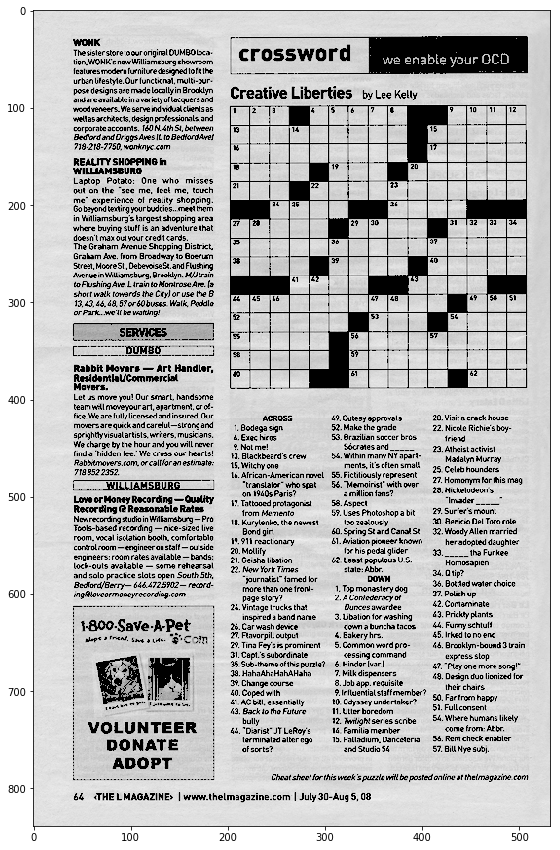

In [38]:
# if value < threshold then value = 0
level, th_pic = cv.threshold(img, 150, 255, cv.THRESH_TOZERO)
show_img(th_pic)

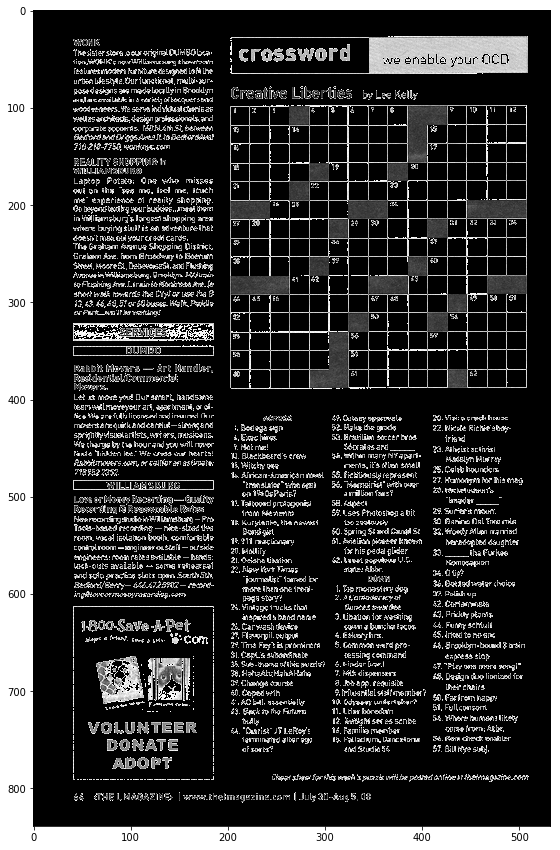

In [42]:
# Inverse of above  
level, th_pic = cv.threshold(img, 170, 255, cv.THRESH_TOZERO_INV)
show_img(th_pic)

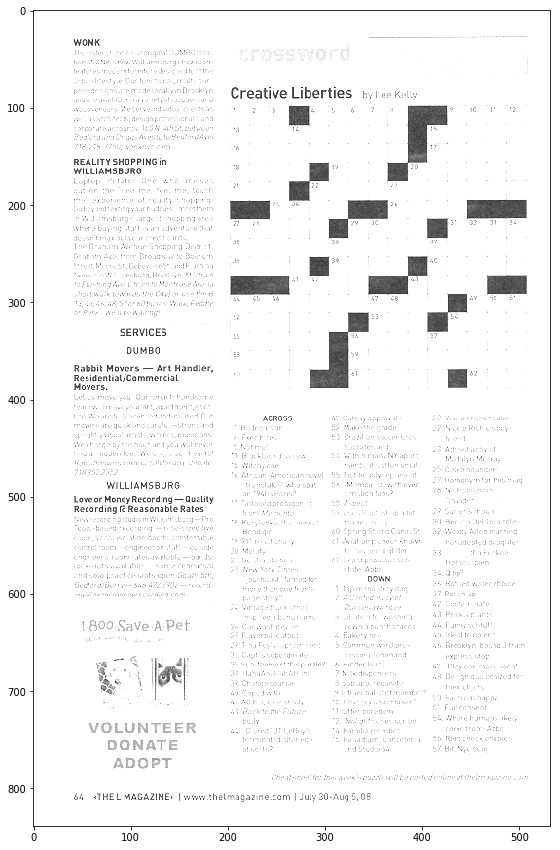

In [47]:
# if value > threshold then value = threshold
# otherwise keep same value
level, th_pic = cv.threshold(img, 127, 255, cv.THRESH_TRUNC)
show_img(th_pic)

<h2> Another function is adaptive threshold </h2>
which adapts to pixels around the pixel to be manipulated

<h3>ADAPTIVE_THRESH_MEAN_C</h3>
Calculates the mean pixel value of the block (blockSize x blockSize) minus c and sets that as threshold value

<h3>ADAPTIVE_THRESH_GAUSSIAN_C</h3>
Threshold value is a weighted sum (cross-correlation with a Gaussian Window) of the block neighbourhood minus c

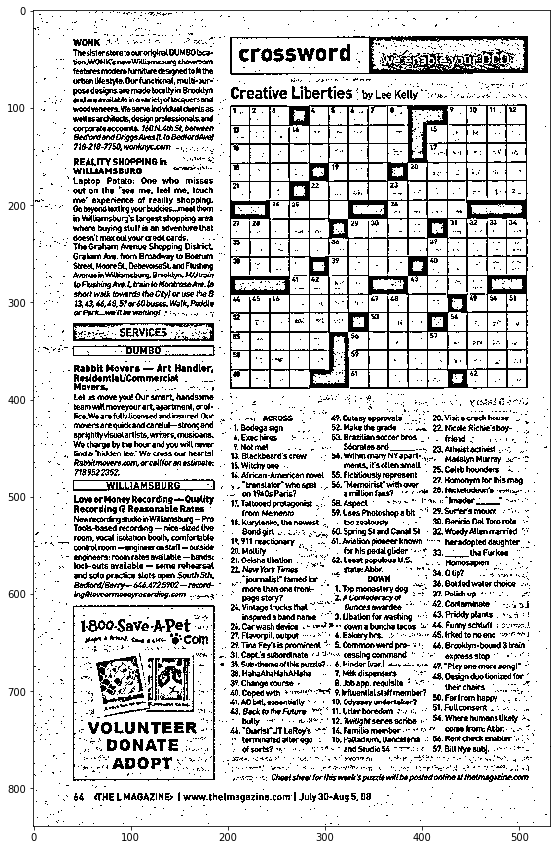

In [102]:
ad_th = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 7)
show_img(ad_th)

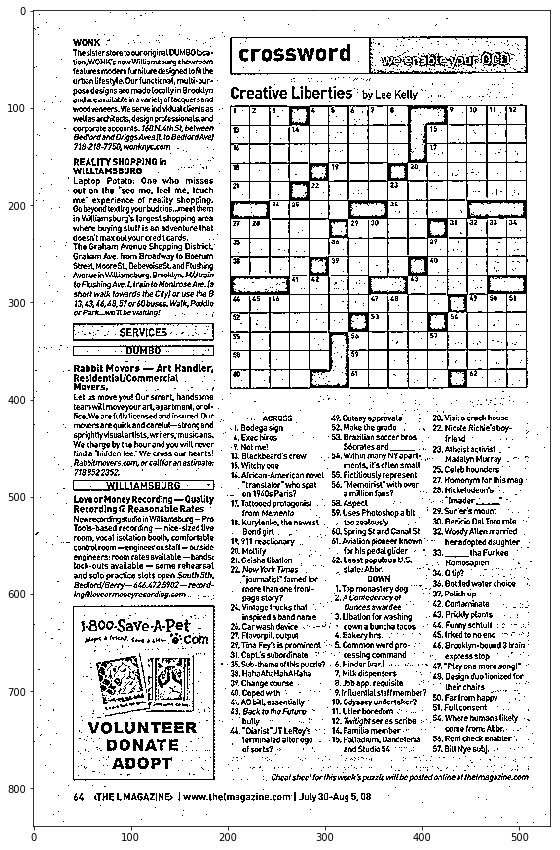

In [77]:
ad_th1 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 8)
show_img(ad_th1)

<h4> We can use blending to obtain a better version of the threshold </h4>

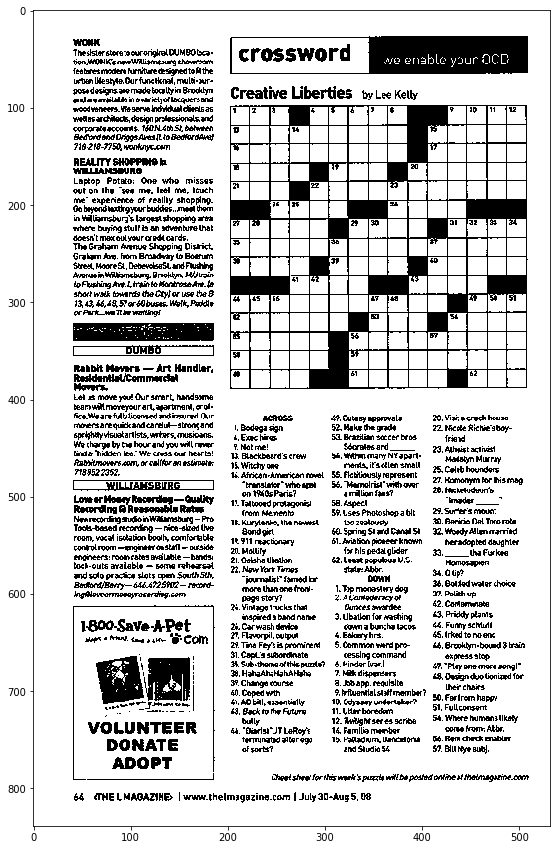

In [79]:
tval, th = cv.threshold(img, 180, 255, cv.THRESH_BINARY)
show_img(th)

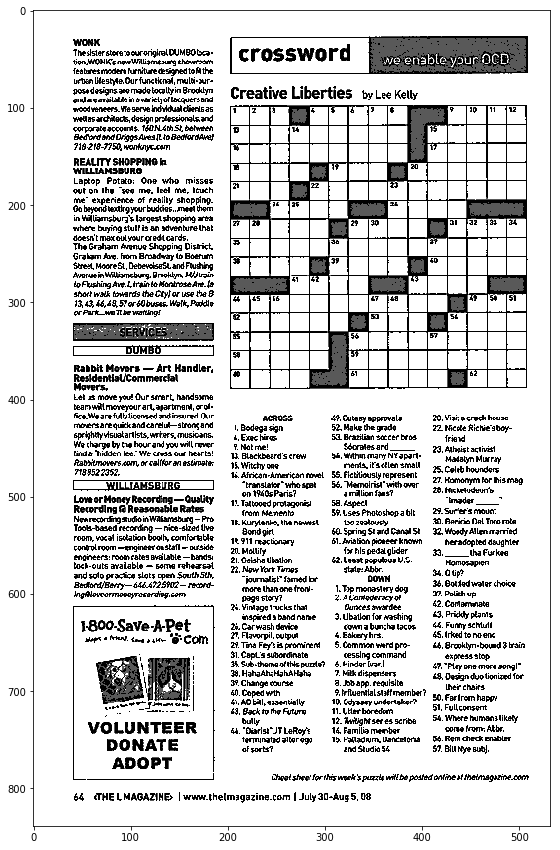

In [98]:
new_thresh = cv.addWeighted(src1 = ad_th1, alpha = 0.3, src2 = th, beta = 1, gamma = 40)
show_img(new_thresh)